## Importing Most commonly used Libraries

In [2]:
# Importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Fetch dataset

In [3]:
#load Dataset 
dataset = pd.read_csv('housing.csv');
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### 25%, 50%, 75% all are percentile 

In [4]:
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F9E8B29F60>,
      dtype=object)

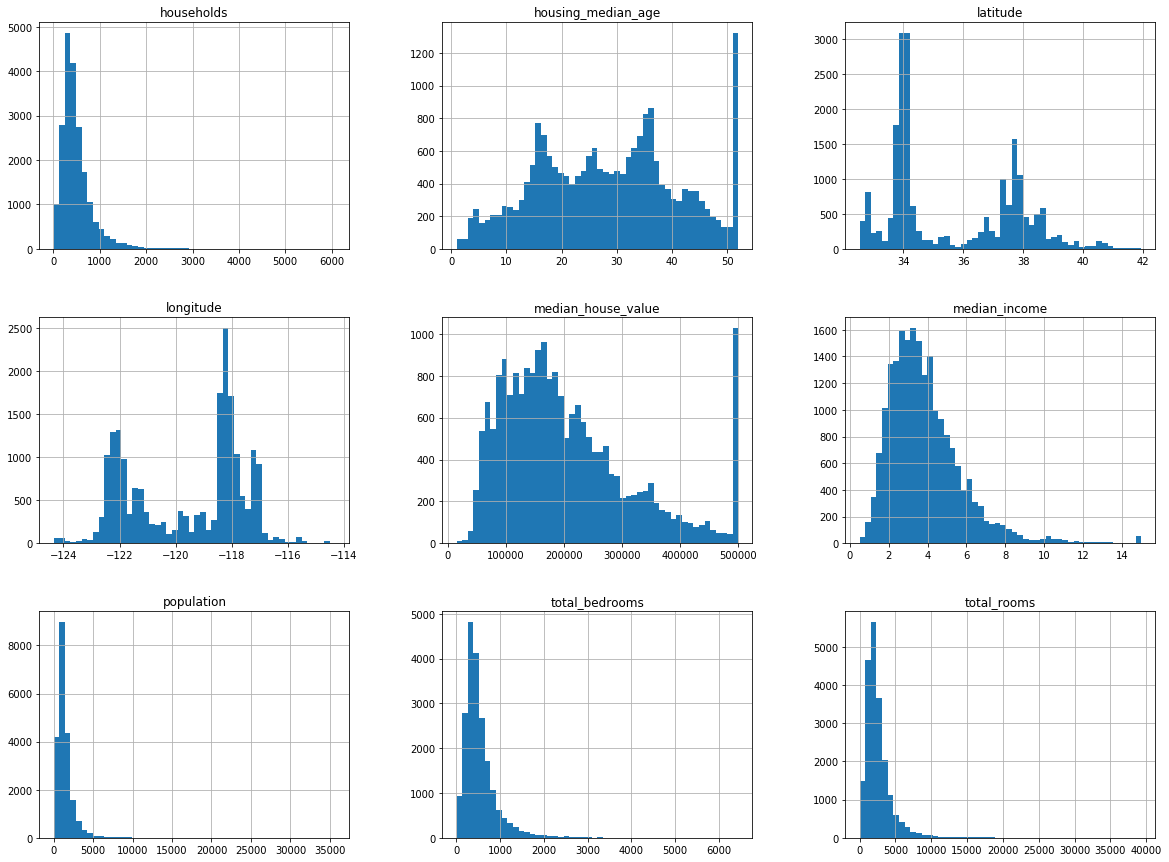

In [5]:
%matplotlib inline
dataset.hist(bins=50, figsize=(20,15))

# 2. Discover and Visualize the Data to Gain Insights

In [6]:
# split dataset in training and test set
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(dataset, random_state=42)

(array([7241., 6834., 1123.,  199.,   83.]),
 array([ 0.4999 ,  3.39994,  6.29998,  9.20002, 12.10006, 15.0001 ]),
 <a list of 5 Patch objects>)

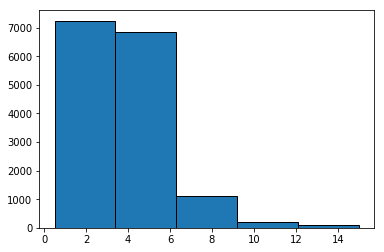

In [7]:
%matplotlib qt
plt.hist(X_train['median_income'], bins=5, edgecolor='black')

### 2.1 Visualize dataset accroding to the longitude and latitude. But, In this it is hard to see any pattern.

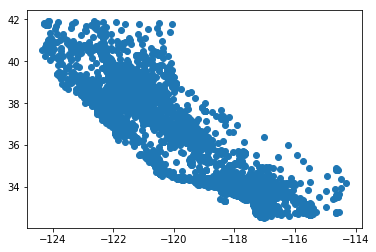

In [8]:
plt.scatter(x=dataset['longitude'], y=dataset['latitude'])

### Setting the alpha option to 0.1 makes it much easier to visualize the places where there is a high density of  data points.

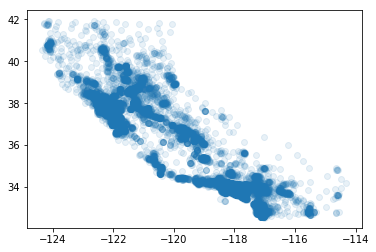

In [9]:
plt.scatter(dataset['longitude'], dataset['latitude'], alpha=0.1)

### This image tells you that the housing prices are very much related to the location (e.g., close to the ocean) and to the population density.

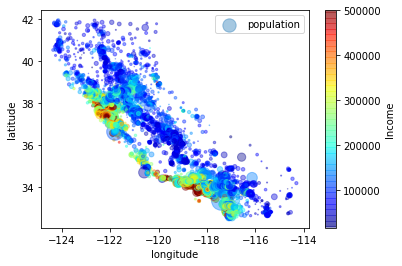

In [10]:
fid, ax = plt.subplots()
p = ax.scatter(x=dataset["longitude"], y=dataset["latitude"], alpha=0.4,
            s=dataset["population"]/100, label="population",
            c=dataset["median_house_value"], cmap=plt.cm.jet)
ax.set_xlabel("longitude")
ax.set_ylabel("latitude")

cbar = plt.colorbar(p, ax=ax) 
cbar.ax.set_ylabel("Income")

plt.legend()
plt.show()
# plt.scatter(x=dataset["longitude"], y=dataset["latitude"], alpha=0.4, 
#             label="population", s=dataset["population"]/100, cmap=plt.cm.jet)
# plt.legend()

### 2.2 Looking for correlations

In [11]:
corr_matrix = dataset.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F9ED5F0240>,
      dtype=object)

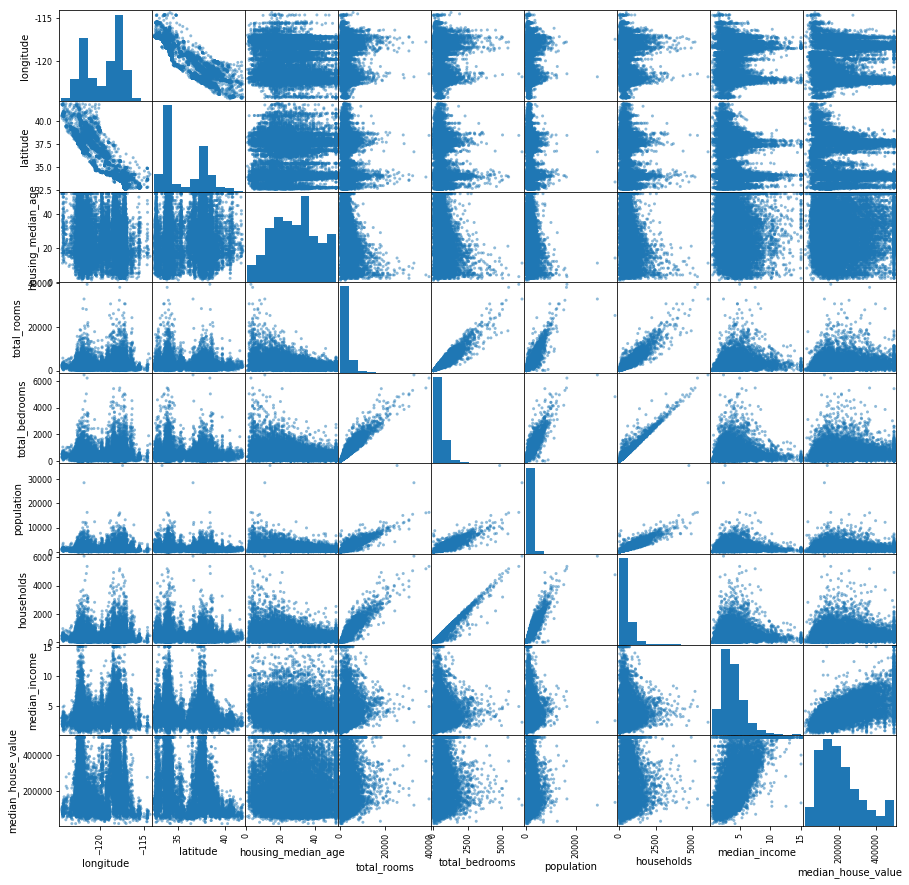

In [12]:
from pandas.plotting import scatter_matrix
scatter_matrix(dataset, figsize=(15,15))

### 2.3 Experimenting with attributes
- Total number of rooms in a district is not very useful if you don’t know how many households there are.
- Similarly, the total number of bedrooms by itself is not very useful. 

In [13]:
dataset['room_per_households'] = dataset['total_rooms'] / dataset['households']
dataset['bedrooms_per_room'] = dataset['total_bedrooms']/dataset['total_rooms']
dataset['population_per_household'] = dataset['population']/dataset['households']

In [14]:
dataset.corr()['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
room_per_households         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

## 3. Prepare the Data for Machine Learning Algorithms

In [15]:
# dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
longitude                   20640 non-null float64
latitude                    20640 non-null float64
housing_median_age          20640 non-null float64
total_rooms                 20640 non-null float64
total_bedrooms              20433 non-null float64
population                  20640 non-null float64
households                  20640 non-null float64
median_income               20640 non-null float64
median_house_value          20640 non-null float64
ocean_proximity             20640 non-null object
room_per_households         20640 non-null float64
bedrooms_per_room           20433 non-null float64
population_per_household    20640 non-null float64
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


In [17]:
# convert categorical data
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# encode all classes in 0,1,2...n
encoder = LabelEncoder()
encode_ocean = encoder.fit_transform(dataset['ocean_proximity'])
print(encoder.classes_)

# onehotencoder 
onehotencoder = OneHotEncoder()
onehot_ocean = onehotencoder.fit_transform(encode_ocean.reshape(-1,1))

#convert onehot_ocean to dataframe
onehot_ocean = pd.DataFrame(onehot_ocean.toarray(), columns=encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [25]:
# Now, Handle NaN values in dataset
dataset_num  = dataset.drop("ocean_proximity", axis=1)
dataset_num_col = dataset_num.columns

from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='median')
dataset_num = imputer.fit_transform(dataset_num)


# convert dataset_num to dataframe
dataset_num = pd.DataFrame(dataset_num, columns=dataset_num_col)

In [32]:
dataset = pd.concat([dataset_num, onehot_ocean], axis=1)

y = dataset['median_house_value']
x = dataset.drop('median_house_value', axis=1)

In [44]:
# split dataset in train and test dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, test_size=0.2)